In [ ]:
                                                  ASSOCIATION RULES ASSIGNMENT

In [9]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.4 MB/s eta 0:00:00


In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("Online Retail.xlsx")
print(df.head())
df

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [2]:

print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB
None


In [3]:
# data processing
# missing values
print("\nmissing values:\n")
df.isnull().sum()  


missing values:



shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [17]:
print(df.columns)


Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [25]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx", header=None)   # adjust filename & extension
print("Before cleaning:", df.shape)
# Drop duplicate 
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)
print(df.head())

Before cleaning: (7501, 1)
After dropping duplicates: (5176, 1)
                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...


In [34]:
#Association rule mining
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
basket = pd.DataFrame(te_array, columns=te.columns_)
print("Basket format (0/1 encoding):")
print(basket.head())

Basket format (0/1 encoding):
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray

In [37]:
# Frequent Itemsets (Apriori)
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
# Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by="confidence", ascending=False)
print("\nFrequent Itemsets (Top 10):")
print(frequent_itemsets.sort_values(by="support", ascending=False).head(10))

print("\nAssociation Rules (Top 10):")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))


Frequent Itemsets (Top 10):
     support             itemsets
37  0.299845      (mineral water)
52  0.229521          (spaghetti)
15  0.208076               (eggs)
11  0.205178          (chocolate)
19  0.192620       (french fries)
36  0.170015               (milk)
26  0.169243          (green tea)
27  0.135819        (ground beef)
24  0.129830  (frozen vegetables)
43  0.125193           (pancakes)

Association Rules (Top 10):
                      antecedents      consequents   support  confidence  \
163                        (soup)  (mineral water)  0.033423    0.471390   
210             (milk, spaghetti)  (mineral water)  0.022604    0.451737   
187             (milk, chocolate)  (mineral water)  0.020093    0.448276   
205      (spaghetti, ground beef)  (mineral water)  0.024730    0.442907   
155                   (olive oil)  (mineral water)  0.038640    0.440529   
127                 (ground beef)  (mineral water)  0.058733    0.432432   
206  (mineral water, ground beef)   

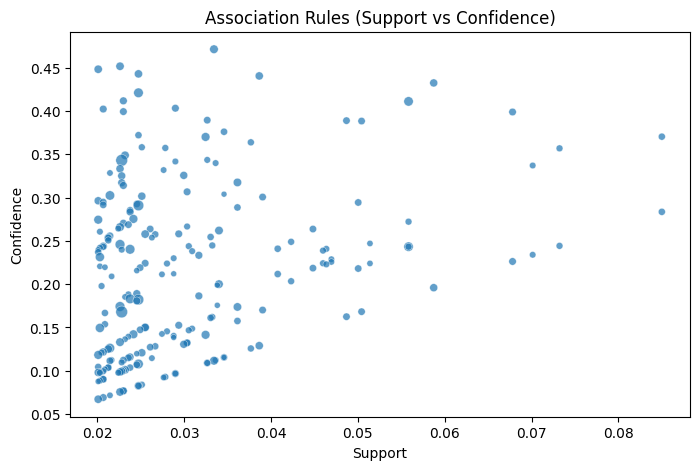

In [39]:
#  Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False, alpha=0.7)
plt.title("Association Rules (Support vs Confidence)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [52]:
print(frequent_itemsets.sort_values(by="support", ascending=False).head(20))

    support                     itemsets
0       1.0                      (bread)
1       0.6                     (butter)
3       0.6                       (milk)
4       0.6              (butter, bread)
6       0.6                (milk, bread)
2       0.4                       (eggs)
5       0.4                (bread, eggs)
8       0.4               (milk, butter)
11      0.4        (milk, butter, bread)
7       0.2               (butter, eggs)
9       0.2                 (milk, eggs)
10      0.2        (butter, bread, eggs)
12      0.2          (milk, bread, eggs)
13      0.2         (milk, butter, eggs)
14      0.2  (milk, butter, bread, eggs)


In [50]:
#Analysis and interpretation
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [68]:
import pandas as pd
import numpy as np
import warnings
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
warnings.filterwarnings("ignore", category=RuntimeWarning)
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter', 'eggs'],
    ['bread', 'eggs']
]
# One-hot encode
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
# Association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
# analysis
rules['analysis'] = rules.apply(analyze_rule, axis=1)
rules = rules[rules['lift'] >= 1.1]
rules = rules.replace([np.inf, -np.inf], np.nan).dropna()

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'analysis']])

              antecedents            consequents  support  confidence  \
7                  (milk)               (butter)      0.4    0.666667   
8                (butter)                 (milk)      0.4    0.666667   
14          (milk, bread)               (butter)      0.4    0.666667   
15        (butter, bread)                 (milk)      0.4    0.666667   
16                 (milk)        (butter, bread)      0.4    0.666667   
17               (butter)          (milk, bread)      0.4    0.666667   
22         (milk, butter)                 (eggs)      0.2    0.500000   
25                 (eggs)         (milk, butter)      0.2    0.500000   
26  (milk, butter, bread)                 (eggs)      0.2    0.500000   
30         (milk, butter)          (bread, eggs)      0.2    0.500000   
33          (bread, eggs)         (milk, butter)      0.2    0.500000   
34                 (eggs)  (milk, butter, bread)      0.2    0.500000   

        lift                                      

In [38]:
# Step 8: Interpretation
for idx, row in rules.head(5).iterrows():
    print(f"If a customer buys {list(row['antecedents'])}, "
          f"they are likely to also buy {list(row['consequents'])} "
          f"with confidence {row['confidence']:.2f} and lift {row['lift']:.2f}.")


If a customer buys ['soup'], they are likely to also buy ['mineral water'] with confidence 0.47 and lift 1.57.
If a customer buys ['milk', 'spaghetti'], they are likely to also buy ['mineral water'] with confidence 0.45 and lift 1.51.
If a customer buys ['milk', 'chocolate'], they are likely to also buy ['mineral water'] with confidence 0.45 and lift 1.50.
If a customer buys ['spaghetti', 'ground beef'], they are likely to also buy ['mineral water'] with confidence 0.44 and lift 1.48.
If a customer buys ['olive oil'], they are likely to also buy ['mineral water'] with confidence 0.44 and lift 1.47.


In [ ]:
#interview questions

1.lift:-Ratio of observed support to expected when a and b are independent,indicates strength of rule over random co-occurrence
lift[x-->y] =support_XY / (support_X * support_Y)

lift[x-->y] =support_XY / (support_X * support_Y)

In [ ]:
lift is imp in association rules because to normalizes confidence by expected frequency and tells positively,negatively associated
without lift we make small mistakes.
lift > 1 positive association
lift < 1 negative association
lift = 1 no association
helps in decision making,measures strength.

In [ ]:
2.support:- transaction in database in which items appears.it shows frequently item appear in data set
support(A) = number of transaction containing A/ total number of transactions 
confidence:- rule is correct for a new transaction containing the antecedent.


# Confidence formula 


confidence = support_XY / support_X



In [71]:
# Ex:
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter', 'eggs'],
    ['bread', 'eggs']
]

X = {'butter', 'eggs'}
Y = {'milk', 'bread'}
total = len(transactions)
count_X = sum(1 for t in transactions if X.issubset(t))
count_XY = sum(1 for t in transactions if X.union(Y).issubset(t))
# Support
support_X = count_X / total
support_XY = count_XY / total
# Confidence
confidence = support_XY / support_X if support_X > 0 else 0
print("Support(X):", support_X)
print("Support(X∪Y):", support_XY)
print("Confidence(X→Y):", confidence)

Support(X): 0.2
Support(X∪Y): 0.2
Confidence(X→Y): 1.0


In [ ]:
3.challenges of association rules mining:- high computation cost on large datasets.
practical difficulties when applying in real life.
many rules associated,making analysis hard.
it weakness of association rule mining things the method cannot easily handle by design.